# **A. Summary**

This model is used to classify diseases based on input of coffee plant leaves to determine the presence or absence of diseases on the coffee plant leaves. By using this model, we can identify the specific disease affecting the coffee plant leaves.


# **B. How to Make the Model?**

## i. Load Libraries

1. Install or upgrade tensorflow_hub
2. Load the libraries needed by using import

## ii. Collect Data

1. Prepare Kaggle Requirementsm, like your kaggle.json
2. Collect dataset from kaggle.

## iii. Preprocessing

1. Creating training and validation folders.
2. Splitting the dataset into training and validation data.
3. Transforming an image file into a portrait.
4. Checking the number of images for each class.

### iv. Training Preparation

1. Setting up the training and validation data directories
2. Configuring the data generator with data augmentation for the training data.

### v. Modelling Process and Save the model

1. Define the model. In this scoop, the model uses:
  - 1 layer of KerasLayer (Transfer Learning),
  - 1 layers of Keras Flatten layer, and
  - 1 layers of Keras Dense layer.

 The activation function used tranfer learning. And the activation function for the last Keras Dense layer is different (`softmax`) is used to do multi-class classification.

2. Define the callbacks that are going to be used. The callback is used to get the notification that the accuracy has reached the threshold of the accuracy. After the threshold has reached, this callback will stop the training process.

3. Compile the model. The loss function used in this model is the `SparseCategoricalCrossentropy`. To fit this model better, the "Adaptive Moment Estimation" (`Adam`) is used for optimization and `accuracy` as the metric.

4. Fit the model with the epoch of 10 (maximum) and test set as validation data.

5. Save the best model into .h5 for retraining or just to load and make some predictions with the model in callbacks.

### vi. Evaluation

1. Plot the accuracy of the model in the epoch. The plot is for accuracy of both the train set and the test set. After plotting, check the graph. Does the accuracy continue to increase or keep decreasing? If it continues to increase, then the model is well-fit.

2. Plot the loss of the model in the epoch. As the opposite of accuracy, the plot is for loss of both the train set and the test set should decrease in each epoch. After plotting, check the graph. Does the loss continue to decrease or keep increasing? If it continues to decrease, then the model is well-fit.

# **Load Libraries**

Load the libraries needed by using import

In [1]:
!pip install --upgrade tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from PIL import Image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import os
import pandas as pd
import random
import shutil
import tensorflow as tf
import tensorflow_hub as hub
import zipfile

# **Collect Data**

Collecting dataset from the source and storing it in a directory to be used for future modeling processes.

## **Prepare Kaggle Requirements**

Don't forget to prepare your kaggle.json

In [3]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

## **Dataset**

Collect dataset from kaggle.

### **Dataset From alvarole**

First dataset from https://www.kaggle.com/datasets/alvarole/coffee-leaves-disease

In [7]:
! kaggle datasets download alvarole/coffee-leaves-disease

 99% 1.39G/1.40G [00:16<00:00, 103MB/s] 
100% 1.40G/1.40G [00:16<00:00, 89.8MB/s]


In [8]:
zip_ref = zipfile.ZipFile('/content/coffee-leaves-disease.zip', 'r')
zip_ref.extractall('/content/alvarole')

zip_ref.close()

In [9]:
alvarole_directories = ['/content/alvarole/miner_img_xml', '/content/alvarole/rust_xml_image']

for directory in alvarole_directories:
  for filename in os.listdir(directory):
      old_path = os.path.join(directory, filename)
      if os.path.isfile(old_path):
        if (old_path[-3:] == 'xml'):
          os.remove(old_path)

### **Dataset From badasstechie**

First dataset from https://www.kaggle.com/datasets/badasstechie/coffee-leaf-diseases

#### **Make Directory**

Create a directory in the google drive to save the dataset.

In [10]:
directories = ['healthy', 'miner', 'phoma', 'rust']
parent_dir = "/content/datasets"

for directory in directories:
  path = os.path.join(parent_dir, directory)
  if os.path.exists(path):
    shutil.rmtree(path)
  os.makedirs(path)

In [11]:
! kaggle datasets download badasstechie/coffee-leaf-diseases

 94% 183M/196M [00:02<00:00, 82.0MB/s]
100% 196M/196M [00:02<00:00, 70.5MB/s]


In [12]:
zip_ref = zipfile.ZipFile('/content/coffee-leaf-diseases.zip', 'r')
zip_ref.extractall('/content/badasstechie')

zip_ref.close()

In [13]:
train_df = pd.read_csv('/content/badasstechie/train_classes.csv')
train_df

,id,miner,rust,phoma
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
1259,1595,0,1,0
1260,1596,0,1,0
1261,1597,0,1,0
1262,1598,0,1,0


In [14]:
for index, row in train_df.iterrows():
  folder_path = '/content/badasstechie/coffee-leaf-diseases/train/images'
  filename = str(row['id']) + '.jpg'
  old_path = os.path.join(folder_path, filename)
  if os.path.isfile(old_path):
    if (row['miner'] == 1):
      new_path = '/content/datasets/miner/' + filename
    if (row['rust'] == 1):
      new_path = '/content/datasets/rust/' + filename
    if (row['phoma'] == 1):
      new_path = '/content/datasets/phoma/' + filename
    if(row['phoma'] == 0 and row['miner'] == 0 and row['rust'] == 0):
      new_path = '/content/datasets/healthy/' + filename
    shutil.move(old_path, new_path)

In [15]:
test_df = pd.read_csv('/content/badasstechie/test_classes.csv')
test_df

,id,miner,rust,phoma
0,64,1,0,0
1,65,1,0,0
2,66,1,0,0
3,67,1,0,0
4,68,1,0,0
...,...,...,...,...
395,1659,0,0,0
396,1660,0,1,0
397,1661,0,1,0
398,1662,0,1,0


In [16]:
for index, row in test_df.iterrows():
  folder_path = '/content/badasstechie/coffee-leaf-diseases/test/images'
  filename = str(row['id']) + '.jpg'
  old_path = os.path.join(folder_path, filename)
  if os.path.isfile(old_path):
    if (row['miner'] == 1):
      new_path = '/content/datasets/miner/' + filename
    if (row['rust'] == 1):
      new_path = '/content/datasets/rust/' + filename
    if (row['phoma'] == 1):
      new_path = '/content/datasets/phoma/' + filename
    if(row['phoma'] == 0 and row['miner'] == 0 and row['rust'] == 0):
      new_path = '/content/datasets/healthy/' + filename
    shutil.move(old_path, new_path)

# **Preprocessing**

Since the data in the dataset is raw, we need to process it before it can be effectively utilized. To obtain the best model, we must provide it with well-processed data, rather than raw data.

In [17]:
import shutil

# Define root directory
root_dir = '/content/datasets/final'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets

  Args:
    root_path (string) - the base directory path to create subdirectories from

  Returns:
    None
  """
  os.makedirs(os.path.join(root_dir, 'training', 'healthy'))
  os.makedirs(os.path.join(root_dir, 'training', 'miner'))
  os.makedirs(os.path.join(root_dir, 'training', 'phoma'))
  os.makedirs(os.path.join(root_dir, 'training', 'rust'))
  os.makedirs(os.path.join(root_dir, 'validation', 'healthy'))
  os.makedirs(os.path.join(root_dir, 'validation', 'miner'))
  os.makedirs(os.path.join(root_dir, 'validation', 'phoma'))
  os.makedirs(os.path.join(root_dir, 'validation', 'rust'))

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [18]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/datasets/final/training
/content/datasets/final/validation
/content/datasets/final/training/rust
/content/datasets/final/training/phoma
/content/datasets/final/training/healthy
/content/datasets/final/training/miner
/content/datasets/final/validation/rust
/content/datasets/final/validation/phoma
/content/datasets/final/validation/healthy
/content/datasets/final/validation/miner


In [19]:
import random

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets

  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

  Returns:
    None
  """
  files = os.listdir(SOURCE_DIR)
  random.shuffle(files)

  num_training = int(len(files) * SPLIT_SIZE)

  for i, file in enumerate(files):
    source_file = os.path.join(SOURCE_DIR, file)
    if os.path.getsize(source_file) == 0:
      print(f"{file} is zero length, so ignoring.")
      continue
    if i < num_training:
      destination_file = os.path.join(TRAINING_DIR, file)
    else:
      destination_file = os.path.join(VALIDATION_DIR, file)

    ## Transforming a image file into a portrait.
    cek_im = cv2.imread(source_file)
    width, height, channel = cek_im.shape
    im = Image.open(source_file)
    if (width < height):
      im = im.rotate(90, expand=True)
    im.save(destination_file)

In [20]:
# Define paths
HEALTHY_SOURCE_DIR = "/content/datasets/healthy/"
MINER_SOURCE_DIR = "/content/datasets/miner/"
PHOMA_SOURCE_DIR = "/content/datasets/phoma/"
RUST_SOURCE_DIR = "/content/datasets/rust/"
MINER_2_SOURCE_DIR = "/content/alvarole/miner_img_xml/"
RUST_2_SOURCE_DIR = "/content/alvarole/rust_xml_image/"

TRAINING_DIR = "/content/datasets/final/training/"
VALIDATION_DIR = "/content/datasets/final/validation/"

TRAINING_HEALTHY_DIR = os.path.join(TRAINING_DIR, "healthy/")
VALIDATION_HEALTHY_DIR = os.path.join(VALIDATION_DIR, "healthy/")

TRAINING_MINER_DIR = os.path.join(TRAINING_DIR, "miner/")
VALIDATION_MINER_DIR = os.path.join(VALIDATION_DIR, "miner/")

TRAINING_PHOMA_DIR = os.path.join(TRAINING_DIR, "phoma/")
VALIDATION_PHOMA_DIR = os.path.join(VALIDATION_DIR, "phoma/")

TRAINING_RUST_DIR = os.path.join(TRAINING_DIR, "rust/")
VALIDATION_RUST_DIR = os.path.join(VALIDATION_DIR, "rust/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_HEALTHY_DIR)) > 0:
  for file in os.scandir(TRAINING_HEALTHY_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_MINER_DIR)) > 0:
  for file in os.scandir(TRAINING_MINER_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PHOMA_DIR)) > 0:
  for file in os.scandir(TRAINING_PHOMA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_RUST_DIR)) > 0:
  for file in os.scandir(TRAINING_RUST_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_HEALTHY_DIR)) > 0:
  for file in os.scandir(VALIDATION_HEALTHY_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_MINER_DIR)) > 0:
  for file in os.scandir(VALIDATION_MINER_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_PHOMA_DIR)) > 0:
  for file in os.scandir(VALIDATION_PHOMA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_RUST_DIR)) > 0:
  for file in os.scandir(VALIDATION_RUST_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(HEALTHY_SOURCE_DIR, TRAINING_HEALTHY_DIR, VALIDATION_HEALTHY_DIR, split_size)
split_data(MINER_SOURCE_DIR, TRAINING_MINER_DIR, VALIDATION_MINER_DIR, split_size)
split_data(PHOMA_SOURCE_DIR, TRAINING_PHOMA_DIR, VALIDATION_PHOMA_DIR, split_size)
split_data(RUST_SOURCE_DIR, TRAINING_RUST_DIR, VALIDATION_RUST_DIR, split_size)
split_data(MINER_2_SOURCE_DIR, TRAINING_MINER_DIR, VALIDATION_MINER_DIR, split_size)
split_data(RUST_2_SOURCE_DIR, TRAINING_RUST_DIR, VALIDATION_RUST_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"Original healthy's directory has {len(os.listdir(HEALTHY_SOURCE_DIR))} images")
print(f"Original miner's directory has {len(os.listdir(MINER_SOURCE_DIR)) + len(os.listdir(MINER_2_SOURCE_DIR))} images\n")
print(f"Original phoma's directory has {len(os.listdir(PHOMA_SOURCE_DIR))} images")
print(f"Original rust's directory has {len(os.listdir(RUST_SOURCE_DIR)) + len(os.listdir(RUST_2_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_HEALTHY_DIR))} images of healthy for training")
print(f"There are {len(os.listdir(TRAINING_MINER_DIR))} images of miner for training")
print(f"There are {len(os.listdir(TRAINING_PHOMA_DIR))} images of phoma for training")
print(f"There are {len(os.listdir(TRAINING_RUST_DIR))} images of rust for training")

print(f"There are {len(os.listdir(VALIDATION_HEALTHY_DIR))} images of healthy for validation")
print(f"There are {len(os.listdir(VALIDATION_MINER_DIR))} images of miner for validation")
print(f"There are {len(os.listdir(VALIDATION_PHOMA_DIR))} images of phoma for validation")
print(f"There are {len(os.listdir(VALIDATION_RUST_DIR))} images of rust for validation")

Original healthy's directory has 400 images
Original miner's directory has 657 images

Original phoma's directory has 484 images
Original rust's directory has 665 images

There are 360 images of healthy for training
There are 591 images of miner for training
There are 435 images of phoma for training
There are 598 images of rust for training
There are 40 images of healthy for validation
There are 66 images of miner for validation
There are 49 images of phoma for validation
There are 67 images of rust for validation


# **Training Preparation**

Setting up the training and validation data directories and configuring the data generator with data augmentation for the training data.

In [21]:
TRAIN_DIR = "/content/datasets/final/training/"
VAL_DIR = "/content/datasets/final/validation/"
CHANNELS = 3
TARGET_SIZE = (224,224)
BATCH_SIZE = 64
EPOCHS = 10

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=TARGET_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        VAL_DIR,
        target_size=TARGET_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='sparse')

Found 1984 images belonging to 4 classes.
Found 222 images belonging to 4 classes.


In [23]:
train_generator.class_indices

{'healthy': 0, 'miner': 1, 'phoma': 2, 'rust': 3}

In [24]:
train_generator.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

<Axes: ylabel='count'>

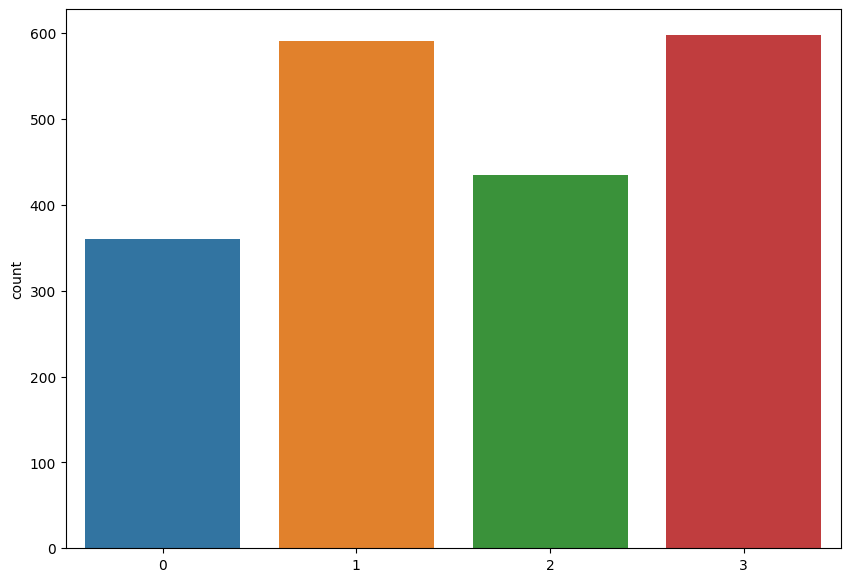

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.countplot(x = train_generator.classes)

# **Modelling Process and Save the model**

The modelling process is the main topic of this document, as the modelling is the part where we make a new model based on the need. These are the steps in the model which will be used in the model. Save the best model into .h5 for retraining or just to load and make some predictions with the model.

In [26]:
pretrained_model = "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5"

base_model = hub.KerasLayer(
    pretrained_model,
    trainable = False,
)

In [28]:
model = tf.keras.Sequential([
                            base_model,
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(4, activation = 'softmax')
])
model.build([None, 224, 224, 3])

model.summary()

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

callbacks = [
             EarlyStopping(monitor = "val_accuracy", patience = 2),
             ModelCheckpoint("model.h5",monitor = 'val_accuracy', verbose = 1, save_best_only = True)
             ]

history = model.fit(train_generator,
          epochs = 10,
          batch_size = BATCH_SIZE,
          validation_data = validation_generator,
          verbose = 1,
          callbacks = callbacks)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1024)              1529968   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 4)                 4100      
                                                                 
Total params: 1,534,068
Trainable params: 4,100
Non-trainable params: 1,529,968
_________________________________________________________________
Epoch 1/10
31/31 [==============================] - ETA: 0s - loss: 0.9840 - accuracy: 0.6119
Epoch 1: val_accuracy improved from -inf to 0.78829, saving model to model.h5
31/31 [==============================] - 180s 6s/step - loss: 0.9840 - accuracy: 0.6119 - val_loss: 0.6455 - val_accuracy: 0.7883
Epoc

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## **Evaluating**

The evaluation process is the last process in this document. This evaluation process aims to evaluate how the model works, and how the model converges through each epoch. There are to graphs going to be made, the accuracy plot, and the loss plot.

In [30]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

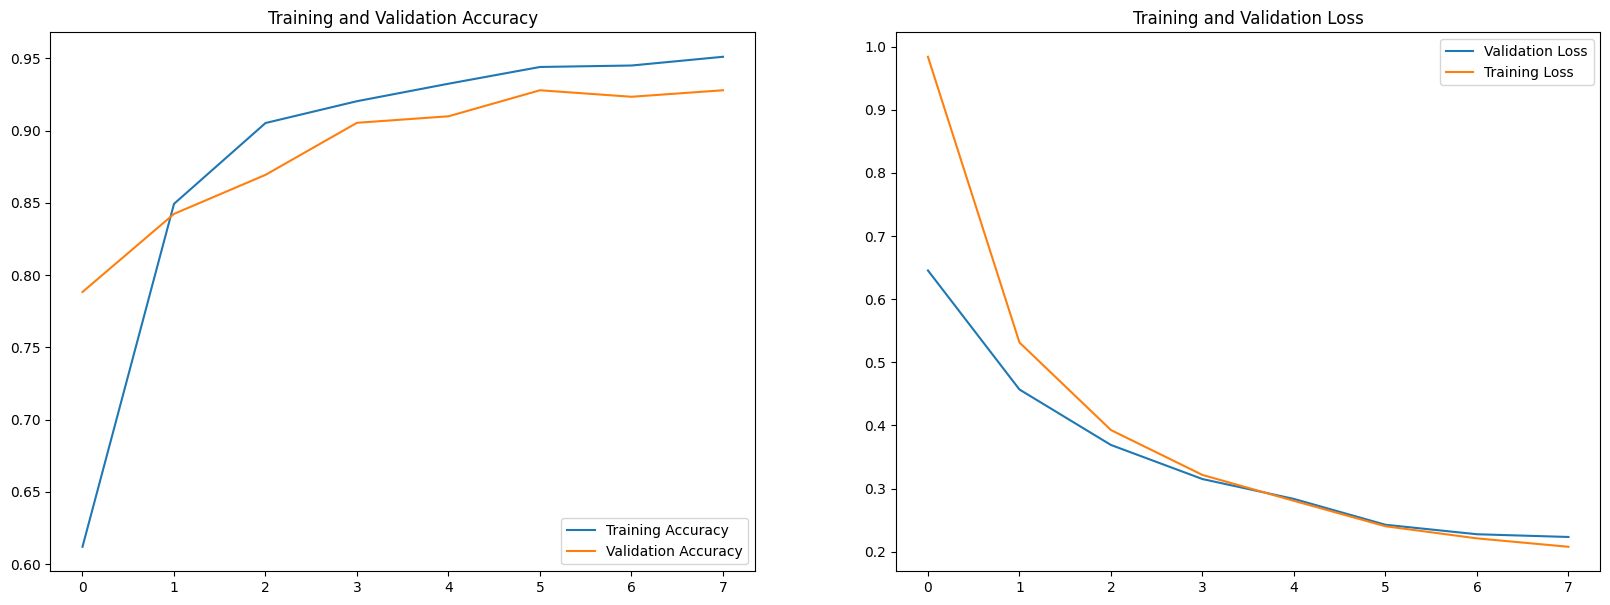

In [32]:
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.plot(range(8), acc, label = 'Training Accuracy')
plt.plot(range(8), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(8), val_loss, label = 'Validation Loss')
plt.plot(range(8), loss, label = 'Training Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

EOF
---